In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from scipy import stats
from matplotlib import gridspec
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x + b

In [2]:
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)


f_c = open("elements.ini",'r')
line = f_c.readlines()
#print(line)
f_c.close()


elements_split = []

for i in line :
    elements_split.append(i.split())
    
    
color_code = []    
for i in elements_split:
    color_code.append([i[1],rgb_to_hex(int(255*float(i[5])),int(255*float(i[6])),int(255*float(i[7])))])
    
print(color_code)


[['H', '#ffffff'], ['D', '#ccccff'], ['He', '#d9ffff'], ['Li', '#cc80ff'], ['Be', '#c2ff00'], ['B', '#ffb5b5'], ['C', '#909090'], ['N', '#2f50f8'], ['O', '#ff0d0d'], ['F', '#90df50'], ['Ne', '#b3e2f5'], ['Na', '#ab5cf1'], ['Mg', '#89ff00'], ['Al', '#bea6a6'], ['Si', '#efc79f'], ['P', '#ff8000'], ['S', '#ffff2f'], ['Cl', '#1fef1f'], ['Ar', '#80d1e2'], ['K', '#8f40d3'], ['Ca', '#3cff00'], ['Sc', '#e6e6e6'], ['Ti', '#bec2c6'], ['V', '#a6a6ab'], ['Cr', '#8999c6'], ['Mn', '#9c79c6'], ['Fe', '#df6633'], ['Co', '#ef909f'], ['Ni', '#50d050'], ['Cu', '#c78033'], ['Zn', '#7c80af'], ['Ga', '#c28f8f'], ['Ge', '#668f8f'], ['As', '#bc80e2'], ['Se', '#ffa000'], ['Br', '#a62929'], ['Kr', '#5cb8d1'], ['Rb', '#6f2daf'], ['Sr', '#00ff00'], ['Y', '#93ffff'], ['Zr', '#93dfdf'], ['Nb', '#73c2c8'], ['Mo', '#53b5b5'], ['Tc', '#3a9e9e'], ['Ru', '#238f8f'], ['Rh', '#097c8b'], ['Pd', '#006985'], ['Ag', '#c0c0c0'], ['Cd', '#ffd98f'], ['In', '#a67573'], ['Sn', '#668080'], ['Sb', '#9e62b5'], ['Te', '#d37900'], ['I'

In [3]:
font_loc = 'C:\Windows\Fonts/segoeui.ttf'
font_labels = fm.FontProperties(fname=font_loc,size=16,weight = 'bold')
font_ticks = fm.FontProperties(fname=font_loc,size=14)

c= ['#EA466C','#FED269','#02DAA2','#00b3fe','#0E8BB3','#120458']

#font2 = fm.FontProperties(fname='C:\Windows\Fonts/NanumSquareOTF_acR.otf',size=14)

In [4]:
fs=18
fss=15
fsl=30
prop2 = fm.FontProperties(fname=font_loc,size=fss)
prop3 = fm.FontProperties(fname=font_loc,size=fs)
prop4 = fm.FontProperties(fname=font_loc,size=fsl)
font_name = fm.FontProperties(fname=font_loc).get_name()
#font_name = fm.FontProperties(fname='/content/font/segoeui.ttf').get_name()


In [5]:
df = pd.read_excel('./adsorption.xlsx')
df

,s,#of N,M,G_Cl_t,G_Cl_b,G_O_t,G_O_b,G_OH_t,G_OH_b,G_OOH_t,G_OOH_b
0,p5,4,Mn,0.80,NaN,1.64,NaN,0.89,NaN,3.86,NaN
1,p5,4,Fe,0.86,NaN,1.77,NaN,0.97,NaN,3.78,NaN
2,p5,4,Co,1.15,NaN,2.77,NaN,1.36,NaN,4.09,NaN
3,p5,4,Ni,1.83,NaN,4.05,NaN,2.23,NaN,4.81,NaN
4,p5,4,Cu,1.90,NaN,4.50,NaN,2.33,NaN,4.86,NaN
...,...,...,...,...,...,...,...,...,...,...,...
67,p5,0,Ag,1.93,1.44,4.92,1.34,2.61,1.20,4.98,3.91
68,p5,0,Ir,0.00,NaN,0.49,0.42,0.24,0.53,3.10,3.69
69,p5,0,Pt,1.47,NaN,3.43,1.24,1.96,1.61,4.80,4.28
70,p5,0,Au,1.97,1.57,4.96,1.78,2.63,1.32,5.00,4.07


In [6]:
#df['G_OH_t'] = df['G_OH_t'] -0.3
#df['G_OH_b'] = df['G_OH_b'] -0.3
#df['G_OOH_t'] = df['G_OOH_t'] -0.3
#df['G_OOH_b'] = df['G_OOH_b'] -0.3

In [7]:
tolist = df.values.tolist()

G_Cl = list()
G_O = list()
G_OH = list()
G_OOH = list()

Cl_site = list()
O_site = list()
OH_site = list()
OOH_site = list()

η_OER = list()
η_CER = list()

for i in range(len(tolist)) :
    #Cl
    if tolist[i][3] < tolist[i][4] or np.isnan(tolist[i][4]) :
        G_Cl.append(tolist[i][3])
        Cl_site.append('t')
    elif tolist[i][3] > tolist[i][4] or np.isnan(tolist[i][3]) :
        G_Cl.append(tolist[i][4])
        Cl_site.append('b')
    #elif tolist[i][3] == tolist[i][4] :
    #    G_Cl.append(tolist[i][4])
    #    Cl_site.append('b')

    #OH    
    if tolist[i][7] < tolist[i][8] or np.isnan(tolist[i][8]) :
        G_OH.append(tolist[i][7])
        OH_site.append('t')
        #print(i)
    elif tolist[i][7] > tolist[i][8] or np.isnan(tolist[i][7]) :
        G_OH.append(tolist[i][8])
        OH_site.append('b')
        #print(i)
        
    #O
    #print(tolist[i][5],tolist[i][6])
    if tolist[i][5] < tolist[i][6] or np.isnan(tolist[i][6]) :
        G_O.append(tolist[i][5])
        O_site.append('t')
        #print(i)
    elif tolist[i][5] > tolist[i][6] or np.isnan(tolist[i][5]) :
        G_O.append(tolist[i][6])
        O_site.append('b')
        #print(i)
    
    #OOH
    if tolist[i][9] < tolist[i][10] or np.isnan(tolist[i][10]) :
        G_OOH.append(tolist[i][9])
        OOH_site.append('t')
    elif tolist[i][9] > tolist[i][10] or np.isnan(tolist[i][9]) :
        G_OOH.append(tolist[i][10])
        OOH_site.append('b')
        

    η_CER_temp = np.max([G_Cl[i]-1.36,1.36-G_Cl[i]])
    η_OER_temp = np.max([G_OH[i],G_O[i]-G_OH[i],G_OOH[i]-G_O[i],1.23*4-G_OOH[i]])-1.23

    η_CER.append(η_CER_temp)
    η_OER.append(η_OER_temp)

In [8]:
df

,s,#of N,M,G_Cl_t,G_Cl_b,G_O_t,G_O_b,G_OH_t,G_OH_b,G_OOH_t,G_OOH_b
0,p5,4,Mn,0.80,NaN,1.64,NaN,0.89,NaN,3.86,NaN
1,p5,4,Fe,0.86,NaN,1.77,NaN,0.97,NaN,3.78,NaN
2,p5,4,Co,1.15,NaN,2.77,NaN,1.36,NaN,4.09,NaN
3,p5,4,Ni,1.83,NaN,4.05,NaN,2.23,NaN,4.81,NaN
4,p5,4,Cu,1.90,NaN,4.50,NaN,2.33,NaN,4.86,NaN
...,...,...,...,...,...,...,...,...,...,...,...
67,p5,0,Ag,1.93,1.44,4.92,1.34,2.61,1.20,4.98,3.91
68,p5,0,Ir,0.00,NaN,0.49,0.42,0.24,0.53,3.10,3.69
69,p5,0,Pt,1.47,NaN,3.43,1.24,1.96,1.61,4.80,4.28
70,p5,0,Au,1.97,1.57,4.96,1.78,2.63,1.32,5.00,4.07


In [9]:
df2 = pd.DataFrame()

In [10]:
df2['#of N'] = df['#of N']
df2['M'] = df['M']
df2['G_Cl'] = G_Cl
df2['G_OH'] = G_OH
df2['G_O'] = G_O
df2['G_OOH'] = G_OOH
df2['η_CER'] = η_CER
df2['η_OER'] = η_OER

df2

,#of N,M,G_Cl,G_OH,G_O,G_OOH,η_CER,η_OER
0,4,Mn,0.80,0.89,1.64,3.86,0.56,0.99
1,4,Fe,0.86,0.97,1.77,3.78,0.50,0.78
2,4,Co,1.15,1.36,2.77,4.09,0.21,0.18
3,4,Ni,1.83,2.23,4.05,4.81,0.47,1.00
4,4,Cu,1.90,2.33,4.50,4.86,0.54,1.10
...,...,...,...,...,...,...,...,...
67,0,Ag,1.44,1.20,1.34,3.91,0.08,1.34
68,0,Ir,0.00,0.24,0.42,3.10,1.36,1.45
69,0,Pt,1.47,1.61,1.24,4.28,0.11,1.81
70,0,Au,1.57,1.32,1.78,4.07,0.21,1.06


In [11]:
df['η_CER_t'] = np.abs(df['G_Cl_t']-1.36)
df['η_CER_b'] = np.abs(df['G_Cl_b']-1.36)
df['G_Cl'] = G_Cl
df['Cl_site'] =Cl_site
df['η_CER'] = np.abs(df['G_Cl']-1.36)

In [12]:
df_n4 = df2[df2['#of N'] == 4]
df_n4

,#of N,M,G_Cl,G_OH,G_O,G_OOH,η_CER,η_OER
0,4,Mn,0.80,0.89,1.64,3.86,0.56,0.99
1,4,Fe,0.86,0.97,1.77,3.78,0.50,0.78
2,4,Co,1.15,1.36,2.77,4.09,0.21,0.18
3,4,Ni,1.83,2.23,4.05,4.81,0.47,1.00
4,4,Cu,1.90,2.33,4.50,4.86,0.54,1.10
5,4,Rh,1.03,1.31,2.78,4.10,0.33,0.24
6,4,Pd,2.07,2.54,4.80,4.95,0.71,1.31
7,4,Ag,2.06,2.71,4.97,4.92,0.70,1.48
8,4,Ir,1.08,1.34,2.41,4.18,0.28,0.54
9,4,Pt,2.03,2.51,4.36,4.98,0.67,1.28


# fig3-(a) _ pourbaix

In [13]:
def surface_pourbaix_bar(cl_at0V,oh_at0V,o_at0V,ooh_at0V,name):
#  name=name.translate(subscript)
  fig, axs = plt.subplots(2, figsize= (12,8), gridspec_kw={'hspace': 0, 'height_ratios': [30, 1]}) # height_ratios : bar 비율
  axs[0].set_title(name+"N$_4$", fontproperties=prop4)


  #plt.title(name,fontsize=16)
  cl=cl_at0V
  oh=oh_at0V
  o=o_at0V
  ooh=ooh_at0V


  # create data
  V = np.arange(0,3,0.01)
  G_plane = [0] * len(V)
  G_Cl = -V+cl
  G_oh = -V+oh
  G_o = -2*V+o
    

  if np.isnan(ooh):
    G_ooh = G_plane
  else :
    G_ooh = -3*V+ooh
  G = np.array([G_plane,G_Cl,G_oh,G_o,G_ooh])

# G_OH > 0 인 경우, OH 생성 x & G_O or G_OH > 0 인 경우 OOH 생성 x
  G_min = []
  for i in range(len(G_plane)) :
    tem = [G_plane[i],G_Cl[i],G_oh[i],G_o[i],G_ooh[i]]
    if G_oh[i] > 0 :
        tem[3],tem[4] = 1,1
    if G_o[i] > 0 :
        tem[4] = 1    
    min_val = np.min(tem)
    G_min.append(min_val)

    
  fi = ['x']*300

  for i in range(len(G_min)) :
    if G_min[i] == G_ooh[i] :
      fi[i] = c[3]
    if G_min[i] == G_plane[i] :
      fi[i] = 'black'
    if G_min[i] == G_oh[i] :
      fi[i] = c[1]
    if G_min[i] == G_o[i] :
      fi[i] = c[2]
    if G_min[i] == G_Cl[i] :
      fi[i] = c[0]

  #print(len(fi))
  x = []
  temp = fi[0]
  for i in range(len(fi)) :
    if temp != fi[i] :
        x.append([i,fi[i-1]])
    temp = fi[i]
    
  x.append([len(fi),fi[-1]])
       # plot lines

  axs[0].plot(V,G_plane, label = "*",c='black')

  axs[0].plot(V,G_oh, label = "OH",c=c[1])
  axs[0].plot(V, G_o, label = "O",c=c[2])
  axs[0].plot(V, G_ooh, label = "OOH",c=c[3])
  axs[0].plot(V,G_Cl, label = "Cl",c=c[0])    
    
  axs[0].axvline(x=1.23,  linestyle='dashed', alpha=0.2,c='gray')
  axs[0].axvline(x=1.36, linestyle='dashed', alpha=0.2,c='gray')

  temp2 = 0
  bh = []
  for i in x :
    bh.append((i[0]-temp2)/100)
    temp2 = i[0]

  #print(x)
  for i in range(len(bh)) :
    axs[1].barh(0,bh[i],left = np.sum(bh[:i]),color = x[i][1],  alpha=.5)

  text_position = (np.min(G_min) + np.max(G_min)) / 2
  th1 = axs[0].text(1.13, text_position, 'OER=1.23V', fontproperties=prop4,rotation=90, rotation_mode='anchor',horizontalalignment='center',multialignment='center',verticalalignment='bottom')
  th1 = axs[0].text(1.56, text_position, 'CER=1.36V', fontproperties=prop4,rotation=90, rotation_mode='anchor',horizontalalignment='center',multialignment='center',verticalalignment='bottom')

  axs[0].get_xaxis().set_visible(False)
  axs[1].set_xticklabels(np.arange(0,3.01,0.5),fontproperties=prop3)  
  axs[0].set_yticklabels(np.arange(-6,4,2),fontproperties=prop3)
  
  axs[0].set_ylim(-6,4)
  axs[1].get_yaxis().set_visible(False)
  axs[0].margins(x=0, y=0)
  axs[1].margins(x=0,y=0)
  axs[0].set_ylabel("ΔG(eV)", fontproperties=prop4)
  axs[1].set_xlabel("Applied potentials (V VS. RHE)", fontproperties=prop4)
  axs[0].legend( loc='upper right', borderpad=1,labelspacing=1.0,prop={'family': font_name,'size':fs})
  axs[1].yaxis.set_visible(False)
  #plt.show()

<ipython-input-13-e1d43c845ddb>:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(np.arange(0,3.01,0.5),fontproperties=prop3)
<ipython-input-13-e1d43c845ddb>:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(np.arange(-6,4,2),fontproperties=prop3)
<ipython-input-13-e1d43c845ddb>:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(np.arange(0,3.01,0.5),fontproperties=prop3)
<ipython-input-13-e1d43c845ddb>:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(np.arange(-6,4,2),fontproperties=prop3)
<ipython-input-13-e1d43c845ddb>:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(np.arange(0,3.01,0.5),fontproperties=prop3)
<ipython-input-13-e1d43c845ddb>:91: UserWarning: FixedFormatter should only be used together with FixedLocat

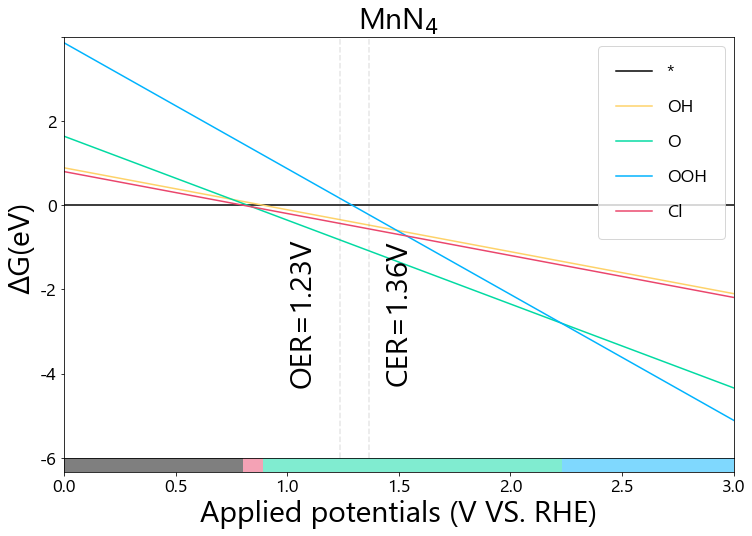

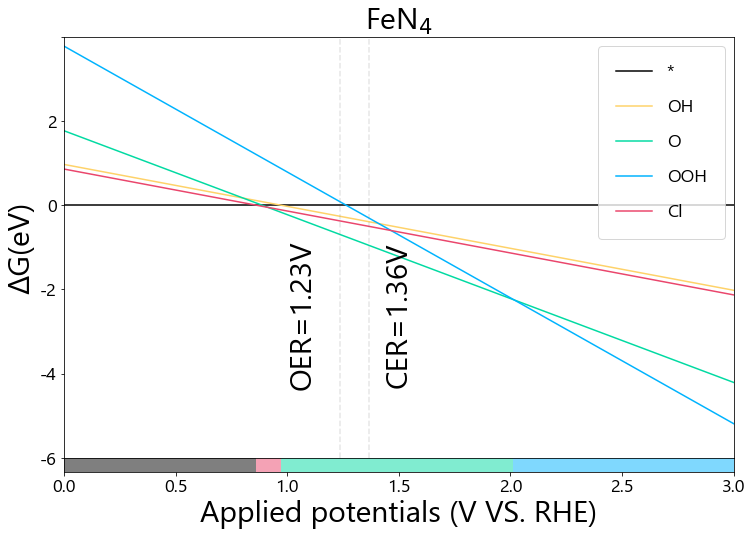

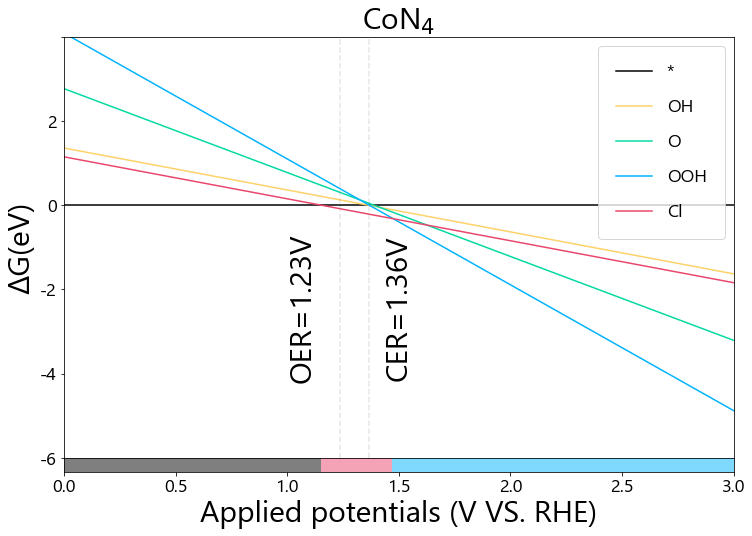

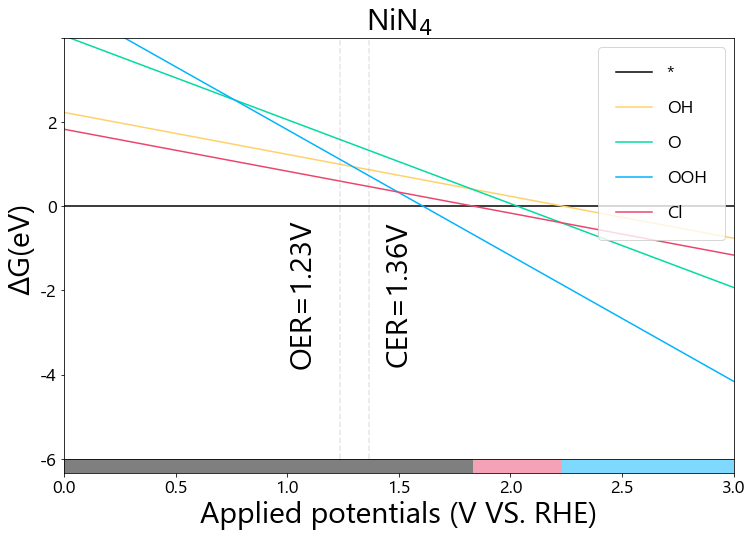

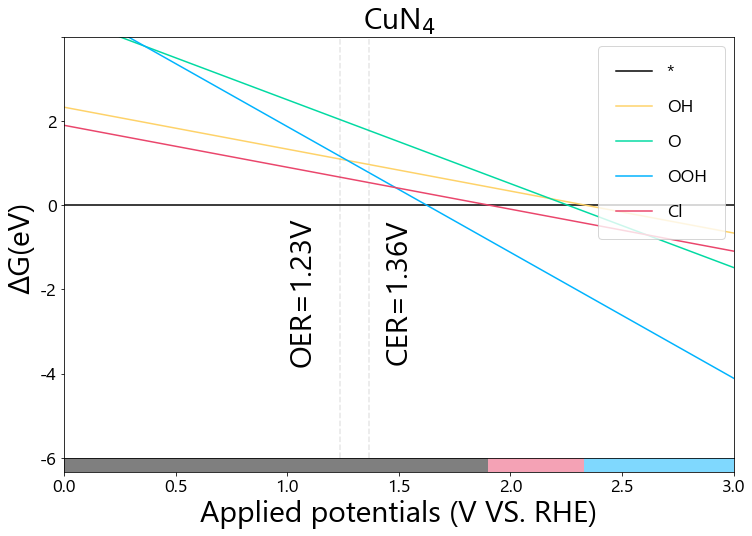

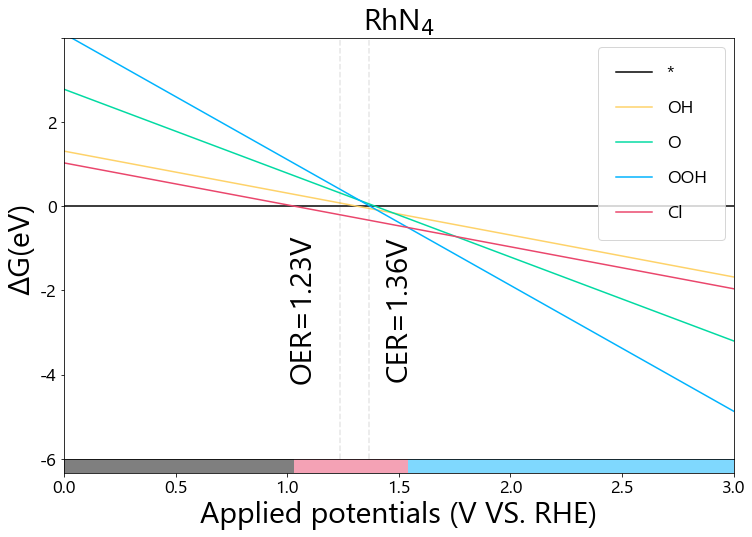

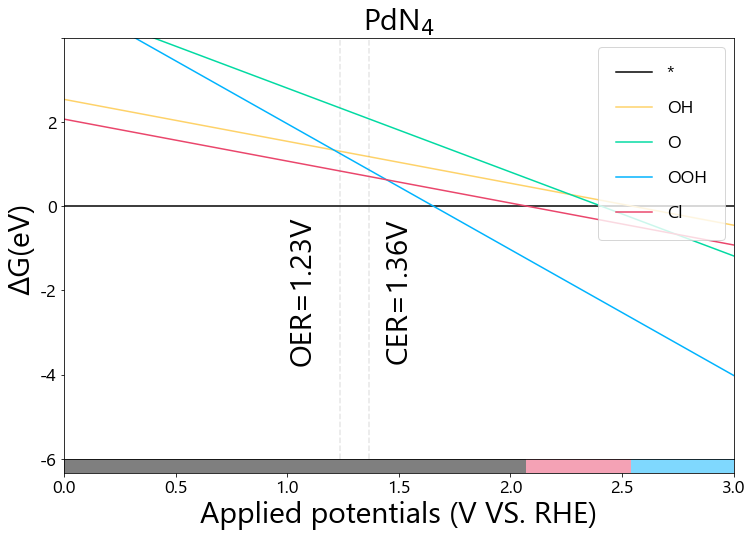

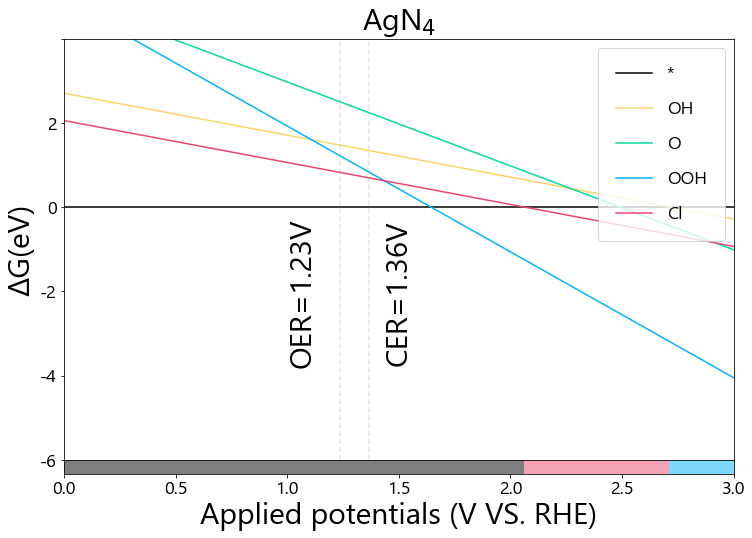

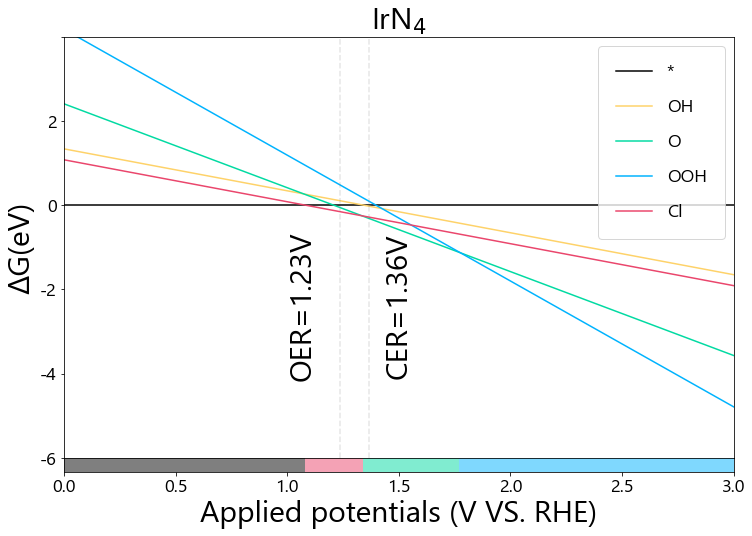

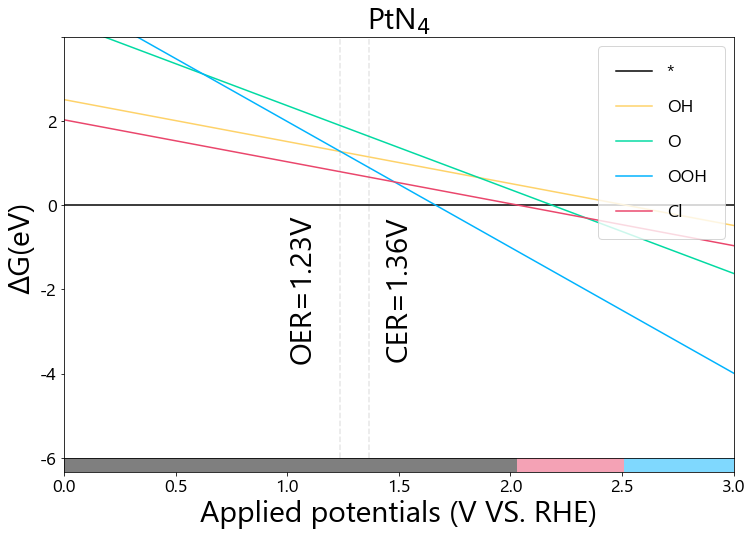

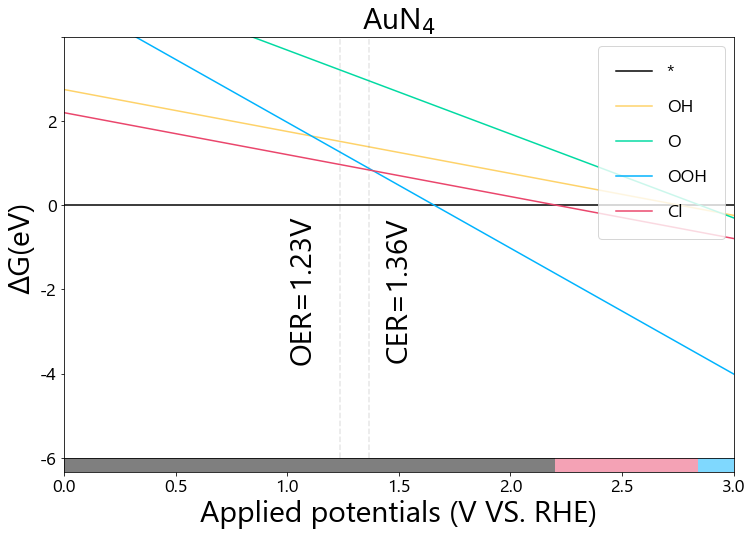

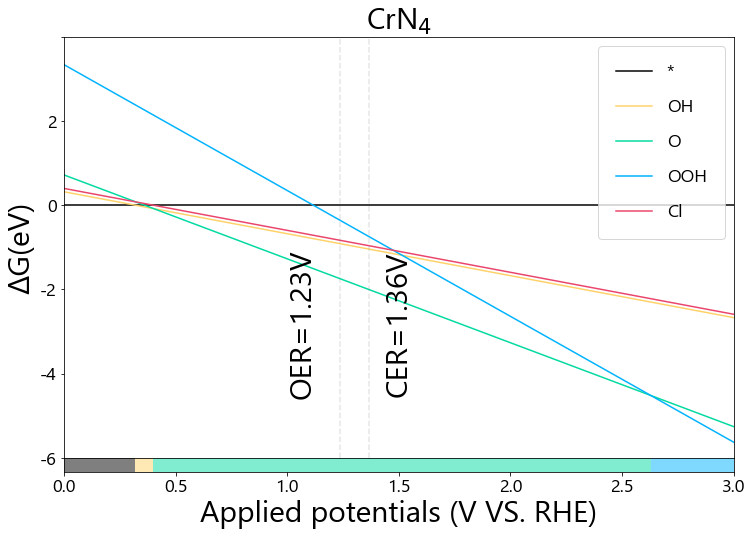

In [14]:
for i in df_n4.values :
    
    surface_pourbaix_bar(i[2],i[3],i[4],i[5],i[1])

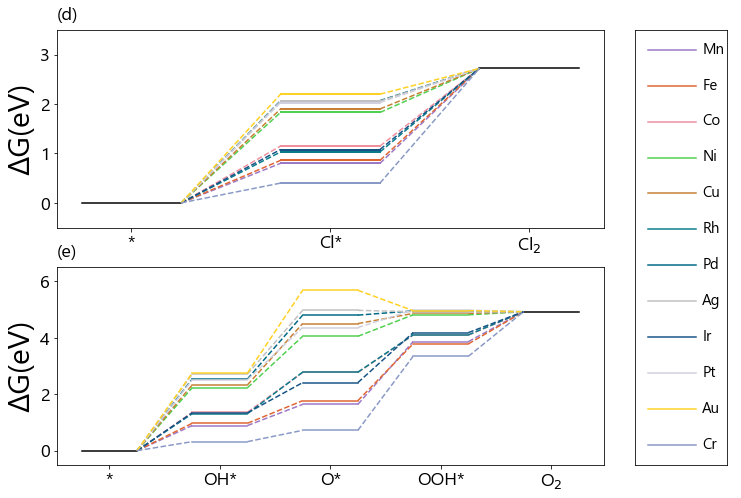

In [15]:


fig = plt.figure(figsize=(12,8))

gs = gridspec.GridSpec(nrows=2, # row 몇 개 
                       ncols=2, # col 몇 개 
                       height_ratios=[1,1], 
                       width_ratios=[12, 2]
                      )
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[:,1])
ax3.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

fig.subplots_adjust(wspace=0.1)

ax1.set_xticks([0.5,2.5,4.5])
ax1.set_xticklabels(['*','Cl*','Cl$_2$'], fontproperties=prop3)
ax2.set_xticks([0.5,2.5,4.5,6.5,8.5])
ax2.set_xticklabels(['*','OH*','O*','OOH*','O$_2$'], fontproperties=prop3)

ax1.set_yticks([0,1,2,3])
ax1.set_yticklabels([0,1,2,3], fontproperties=prop3)
ax2.set_yticks([0,2,4,6])
ax2.set_yticklabels([0,2,4,6], fontproperties=prop3)

ax3.set_xlim(0,1.5)

ax1.set_title("(d)",loc='left', fontproperties=prop3,pad=10)
ax2.set_title("(e)",loc='left', fontproperties=prop3,pad=10)

ax1.set_ylabel("ΔG(eV)", fontproperties=prop4)
ax2.set_ylabel("ΔG(eV)", fontproperties=prop4)

ax1.set_ylim(-0.5,3.5)
ax2.set_ylim(-0.5,6.5)

#ax1.tick_params(axis='y', which='major',labelsize = fss)
#ax2.tick_params(axis='y', which='major',labelsize = fss)
#ax1 = fig.add_subplot(2,2,1)
#ax2 = fig.add_subplot(2,2,3)
#ax3 = fig.add_subplot(1,2,2)




ax1.plot([0,1],[0,0],c='black')
ax1.plot([4,5],[2.72,2.72],c='black')


ax2.plot([0,1],[0,0],c='black')
ax2.plot([8,9],[1.23*4,1.23*4],c='black')



for i, value in enumerate(df_n4.values) :
    for j in color_code :
        if value[1] == j[0] :
            color = j[1]
    
    
    
    ax1.plot([1,2],[0,value[2]],'--' , c = color)
    ax1.plot([2,3],[value[2],value[2]],c = color, linewidth=2)
    ax1.plot([3,4],[value[2],2.72],'--', c = color)
    
    
    #ax2.plot([1,2],[0,value[3]],'--' , c = color)
    #ax2.plot([2,3],[value[3],value[3]] , c = color)
    #ax2.plot([3,4],[value[3],value[4]-value[3]],'--', c = color)
    #ax2.plot([4,5],[value[4]-value[3],value[4]-value[3]] , c = color)    
    #ax2.plot([5,6],[value[4]-value[3],value[5]-value[4]],'--', c = color)
    #ax2.plot([6,7],[value[5]-value[4],value[5]-value[4]] , c = color)        
    #ax2.plot([7,8],[value[5]-value[4],1.23*4] ,'--', c = color) 
    
    ax2.plot([1,2],[0,value[3]],'--' , c = color)
    ax2.plot([2,3],[value[3],value[3]] , c = color)
    ax2.plot([3,4],[value[3],value[4]],'--', c = color)
    ax2.plot([4,5],[value[4],value[4]] , c = color)    
    ax2.plot([5,6],[value[4],value[5]],'--', c = color)
    ax2.plot([6,7],[value[5],value[5]] , c = color)        
    ax2.plot([7,8],[value[5],1.23*4] ,'--', c = color) 
    
    
    ax3.plot([0.2,1],[12-i,12-i],c = color)
    ax3.text(1.1,(12-i)-0.1,value[1],fontproperties=prop2)




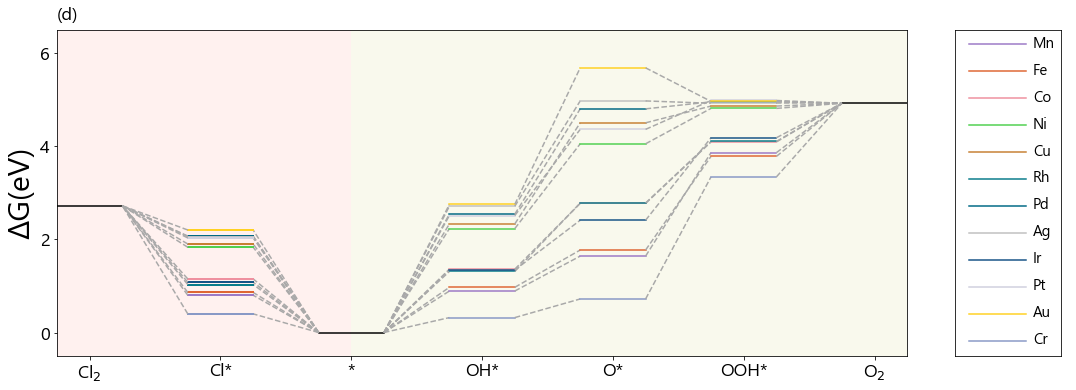

In [16]:


fig = plt.figure(figsize=(18,6))

gs = gridspec.GridSpec(nrows=1, # row 몇 개 
                       ncols=2, # col 몇 개 
                       width_ratios=[16,2]
                      )
ax1 = fig.add_subplot(gs[0,0])
ax3 = fig.add_subplot(gs[0,1])
ax3.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

fig.subplots_adjust(wspace=0.1)

ax1.set_xticks([-3.5,-1.5,0.5,2.5,4.5,6.5,8.5])
ax1.set_xticklabels(['Cl$_2$','Cl*','*','OH*','O*','OOH*','O$_2$'], fontproperties=prop3)

ax1.set_yticks([0,2,4,6])
ax1.set_yticklabels([0,2,4,6], fontproperties=prop3)


ax3.set_xlim(0,1.5)

ax1.set_title("(d)",loc='left', fontproperties=prop3,pad=10)
#ax2.set_title("(e)",loc='left', fontproperties=prop3,pad=10)

ax1.set_ylabel("ΔG(eV)", fontproperties=prop4)
#ax2.set_ylabel("ΔG(eV)", fontproperties=prop4)

ax1.set_ylim(-0.5,6.5)

#ax1.tick_params(axis='y', which='major',labelsize = fss)
#ax2.tick_params(axis='y', which='major',labelsize = fss)
#ax1 = fig.add_subplot(2,2,1)
#ax2 = fig.add_subplot(2,2,3)
#ax3 = fig.add_subplot(1,2,2)




ax1.plot([-3,-4],[2.72,2.72],c='black')

ax1.plot([0,1],[0,0],c='black')
ax1.plot([8,9],[1.23*4,1.23*4],c='black')

#cs = ax1.pcolor([-4,.5,9], [-0.5,6.5],[[1,2,3],[4,5,6]])
ax1.margins(0) # remove default margins (matplotlib verision 2+)

ax1.axvspan(-4,.5, facecolor='mistyrose', alpha=0.5)
ax1.axvspan(.5, 9, facecolor='beige', alpha=0.5)


for i, value in enumerate(df_n4.values) :
    for j in color_code :
        if value[1] == j[0] :
            color = j[1]
    
    
    
    ax1.plot([0,-1],[0,value[2]],'--' , c = 'darkgray')
    ax1.plot([-1,-2],[value[2],value[2]],c = color, linewidth=2)
    ax1.plot([-2,-3],[value[2],2.72],'--', c = 'darkgray')
    
    
    #ax2.plot([1,2],[0,value[3]],'--' , c = color)
    #ax2.plot([2,3],[value[3],value[3]] , c = color)
    #ax2.plot([3,4],[value[3],value[4]-value[3]],'--', c = color)
    #ax2.plot([4,5],[value[4]-value[3],value[4]-value[3]] , c = color)    
    #ax2.plot([5,6],[value[4]-value[3],value[5]-value[4]],'--', c = color)
    #ax2.plot([6,7],[value[5]-value[4],value[5]-value[4]] , c = color)        
    #ax2.plot([7,8],[value[5]-value[4],1.23*4] ,'--', c = color) 
    
    ax1.plot([1,2],[0,value[3]],'--' , c = 'darkgray')
    ax1.plot([2,3],[value[3],value[3]] , c = color)
    ax1.plot([3,4],[value[3],value[4]],'--', c = 'darkgray')
    ax1.plot([4,5],[value[4],value[4]] , c = color)    
    ax1.plot([5,6],[value[4],value[5]],'--', c = 'darkgray')
    ax1.plot([6,7],[value[5],value[5]] , c = color)        
    ax1.plot([7,8],[value[5],1.23*4] ,'--', c = 'darkgray') 
    
    
    ax3.plot([0.2,1],[12-i,12-i],c = color)
    ax3.text(1.1,(12-i)-0.1,value[1],fontproperties=prop2)

    


Text(0, 2.8916, '1.23V')

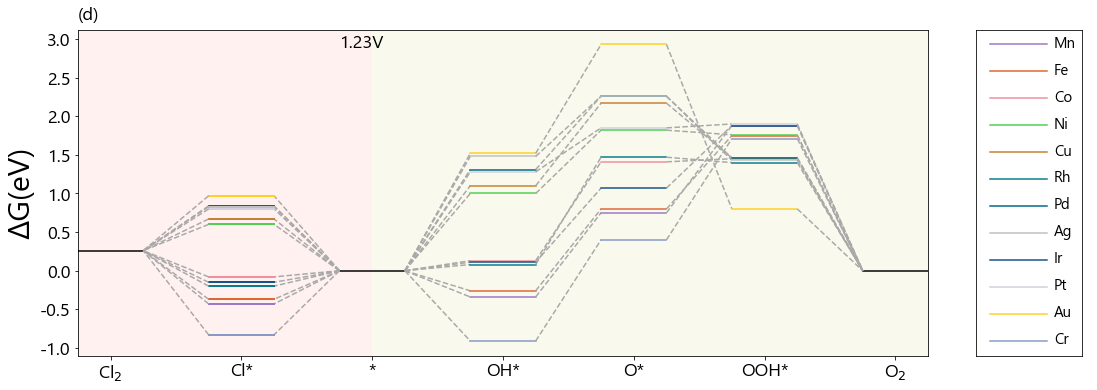

In [17]:
voltage = 1.23 # V
OER_bgcolor = 'beige'
CER_bgcolor = 'mistyrose'




fig = plt.figure(figsize=(18,6))

gs = gridspec.GridSpec(nrows=1, # row 몇 개 
                       ncols=2, # col 몇 개 
                       width_ratios=[16,2]
                      )
ax1 = fig.add_subplot(gs[0,0])
ax3 = fig.add_subplot(gs[0,1])
ax3.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

fig.subplots_adjust(wspace=0.1)

ax1.set_xticks([-3.5,-1.5,0.5,2.5,4.5,6.5,8.5])
ax1.set_xticklabels(['Cl$_2$','Cl*','*','OH*','O*','OOH*','O$_2$'], fontproperties=prop3)


# background 색깔지정
ax1.margins(0) # remove default margins (matplotlib verision 2+)

ax1.axvspan(-4,.5, facecolor=CER_bgcolor, alpha=0.5)
ax1.axvspan(.5, 9, facecolor=OER_bgcolor , alpha=0.5)


ax1.set_title("(d)",loc='left', fontproperties=prop3,pad=10)
#ax2.set_title("(e)",loc='left', fontproperties=prop3,pad=10)

ax1.set_ylabel("ΔG(eV)", fontproperties=prop4)
#ax2.set_ylabel("ΔG(eV)", fontproperties=prop4)


# CER 및 OER initial, final 표시
CER_fin = 2.72 - 2*voltage
OER_fin = (1.23-voltage)*4

ax1.plot([-3,-4],[CER_fin,CER_fin],c='black')
ax1.plot([0,1],[0,0],c='black')
ax1.plot([8,9],[OER_fin,OER_fin],c='black')

minmax = [0]

# CER/OER plot
for i, value in enumerate(df_n4.values) :
    for j in color_code :
        if value[1] == j[0] :
            color = j[1]
    
    # CER step
    CER_step1 = value[2]-voltage

    ax1.plot([0,-1],[0,CER_step1],'--' , c = 'darkgray')
    ax1.plot([-1,-2],[CER_step1,CER_step1],c = color, linewidth=2)
    ax1.plot([-2,-3],[CER_step1,CER_fin],'--', c = 'darkgray')
    
    #OER step
    OER_step1 = value[3] - voltage
    OER_step2 = value[4] - OER_step1 - voltage
    OER_step3 = value[5] - OER_step2 - voltage
    
    ax1.plot([1,2],[0,OER_step1],'--' , c = 'darkgray')
    ax1.plot([2,3],[OER_step1,OER_step1] , c = color)
    ax1.plot([3,4],[OER_step1,OER_step2],'--', c = 'darkgray')
    ax1.plot([4,5],[OER_step2,OER_step2] , c = color)    
    ax1.plot([5,6],[OER_step2,OER_step3],'--', c = 'darkgray')
    ax1.plot([6,7],[OER_step3,OER_step3] , c = color)        
    ax1.plot([7,8],[OER_step3,OER_fin] ,'--', c = 'darkgray') 
    
    appendlist = [CER_step1,CER_fin,OER_step1,OER_step2,OER_step3,OER_fin]
    for j in appendlist : minmax.append(j)
    
    # metal 색깔 지정 
    ax3.plot([0.2,1],[12-i,12-i],c = color)
    ax3.text(1.1,(12-i)-0.1,value[1],fontproperties=prop2)

ax3.set_xlim(0,1.5)

# ytick, ylim 지정. ylim은 max값과 min값 차이 + 5% 
rg = abs(np.min(np.array(minmax))) +abs(np.max(np.array(minmax)))
ax1.set_ylim(np.min(np.array(minmax))-0.05*rg,np.max(np.array(minmax))+0.05*rg)
ax1.set_yticks(np.arange(np.floor(np.min(np.array(minmax))),np.ceil(np.max(np.array(minmax)))+1e-5,0.5))
ax1.set_yticklabels(np.arange(np.floor(np.min(np.array(minmax))),np.ceil(np.max(np.array(minmax)))+1e-5,0.5), fontproperties=prop3)

ax1.text(0,np.max(np.array(minmax)) - 0.01*rg ,str(voltage)+'V',fontproperties=prop3  )

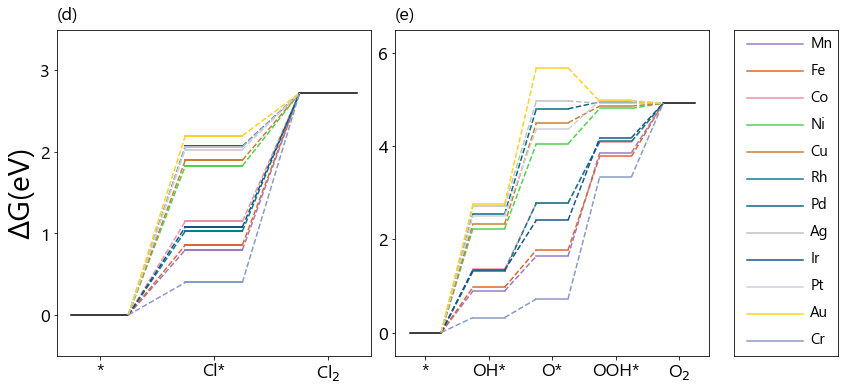

In [18]:


fig = plt.figure(figsize=(14,6))

gs = gridspec.GridSpec(nrows=1, # row 몇 개 
                       ncols=3, # col 몇 개 
                       width_ratios=[6,6,2]
                      )
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax3.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

fig.subplots_adjust(wspace=0.1)

ax1.set_xticks([0.5,2.5,4.5])
ax1.set_xticklabels(['*','Cl*','Cl$_2$'], fontproperties=prop3)
ax2.set_xticks([0.5,2.5,4.5,6.5,8.5])
ax2.set_xticklabels(['*','OH*','O*','OOH*','O$_2$'], fontproperties=prop3)

ax1.set_yticks([0,1,2,3])
ax1.set_yticklabels([0,1,2,3], fontproperties=prop3)
ax2.set_yticks([0,2,4,6])
ax2.set_yticklabels([0,2,4,6], fontproperties=prop3)

ax3.set_xlim(0,1.5)

ax1.set_title("(d)",loc='left', fontproperties=prop3,pad=10)
ax2.set_title("(e)",loc='left', fontproperties=prop3,pad=10)

ax1.set_ylabel("ΔG(eV)", fontproperties=prop4)
#ax2.set_ylabel("ΔG(eV)", fontproperties=prop4)

ax1.set_ylim(-0.5,3.5)
ax2.set_ylim(-0.5,6.5)

#ax1.tick_params(axis='y', which='major',labelsize = fss)
#ax2.tick_params(axis='y', which='major',labelsize = fss)
#ax1 = fig.add_subplot(2,2,1)
#ax2 = fig.add_subplot(2,2,3)
#ax3 = fig.add_subplot(1,2,2)




ax1.plot([0,1],[0,0],c='black')
ax1.plot([4,5],[2.72,2.72],c='black')


ax2.plot([0,1],[0,0],c='black')
ax2.plot([8,9],[1.23*4,1.23*4],c='black')



for i, value in enumerate(df_n4.values) :
    for j in color_code :
        if value[1] == j[0] :
            color = j[1]
    
    
    
    ax1.plot([1,2],[0,value[2]],'--' , c = color)
    ax1.plot([2,3],[value[2],value[2]],c = color, linewidth=2)
    ax1.plot([3,4],[value[2],2.72],'--', c = color)
    
    
    #ax2.plot([1,2],[0,value[3]],'--' , c = color)
    #ax2.plot([2,3],[value[3],value[3]] , c = color)
    #ax2.plot([3,4],[value[3],value[4]-value[3]],'--', c = color)
    #ax2.plot([4,5],[value[4]-value[3],value[4]-value[3]] , c = color)    
    #ax2.plot([5,6],[value[4]-value[3],value[5]-value[4]],'--', c = color)
    #ax2.plot([6,7],[value[5]-value[4],value[5]-value[4]] , c = color)        
    #ax2.plot([7,8],[value[5]-value[4],1.23*4] ,'--', c = color) 
    
    ax2.plot([1,2],[0,value[3]],'--' , c = color)
    ax2.plot([2,3],[value[3],value[3]] , c = color)
    ax2.plot([3,4],[value[3],value[4]],'--', c = color)
    ax2.plot([4,5],[value[4],value[4]] , c = color)    
    ax2.plot([5,6],[value[4],value[5]],'--', c = color)
    ax2.plot([6,7],[value[5],value[5]] , c = color)        
    ax2.plot([7,8],[value[5],1.23*4] ,'--', c = color) 
    
    
    ax3.plot([0.2,1],[12-i,12-i],c = color)
    ax3.text(1.1,(12-i)-0.1,value[1],fontproperties=prop2)




In [19]:
df_n4.values[0]

array([4, 'Mn', 0.8, 0.89, 1.64, 3.86, 0.56, 0.9899999999999998],
      dtype=object)

In [20]:
def volcano_lwr(TM,name,loc_legend) :
    plt.figure(1,figsize=(12,12))
    ax = plt.subplot(111)
    prop3 = fm.FontProperties(fname=font_loc,size=32)
    prop33 = fm.FontProperties(fname=font_loc,size=26)
    prop4 = fm.FontProperties(fname=font_loc,size=40)
    font_name = fm.FontProperties(fname=font_loc).get_name()
    x = []
    y = []
    plt.xlim(0,2.72)
    plt.ylim(-1.2,0.1)
    plt.xticks([0,1.36,2.72],fontproperties=prop3)
    plt.yticks(np.arange(-1,0.1, 0.5),fontproperties=prop3)
    x_fit = np.arange(0,1.36*2,0.01)
    y_fit1 = x_fit-1.36
    y_fit2 = 1.36-x_fit
    y_fit = np.maximum(y_fit1,y_fit2)
    ax.plot(x_fit,-y_fit,color='gray', linestyle='--',linewidth=2,alpha=0.7) 
    
    l = [TM+'N$_4$',TM+'N$_3$C',TM+'N$_2$C$_2$',TM+'N$_2$C$_2$-t',TM+'NC$_3$',TM+'C$_4$']
    j = 0
    

    Gcl = list(df.loc[df['M']== TM, 'G_Cl'])
    η_CER = list(df.loc[df['M']== TM, 'η_CER'])
    site = list(df.loc[df['M']== TM, 'Cl_site'])
    
    j = 0
    for i in range(len(Gcl)) :
        if site[i] == 't' :
            plt.scatter(Gcl[i],-η_CER[i],color=c[i],s=500,label=l[i],marker='o')
            
        else :
            plt.scatter(Gcl[i],-η_CER[i],color=c[i],s=500,label=l[i],marker='^')

        if j < 5 :

            ann = ax.annotate("",
                              xy=(Gcl[j+1], -η_CER[j+1]), xycoords='data',
                              xytext=(Gcl[j], -η_CER[j]), textcoords='data',
                              size=40, va="center", ha="center",
                              arrowprops=dict(lw=2,arrowstyle="-|>",connectionstyle="arc3,rad=-1",fc="w")
                             )
            j = j+1
    
    
    plt.legend(loc=loc_legend, borderpad=0.5,labelspacing=0.5,prop={'family': font_name,'size':fss})
    plt.xlabel('$\mathrm{ΔG_{Cl}}$'+'(eV)', fontproperties=prop4)
    plt.ylabel('$\mathrm{-η_{CER}}$'+'(V)', fontproperties=prop4)    
    plt.savefig(str(name),dpi=100)
    #plt.show()


<ipython-input-20-30153ac658c8>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


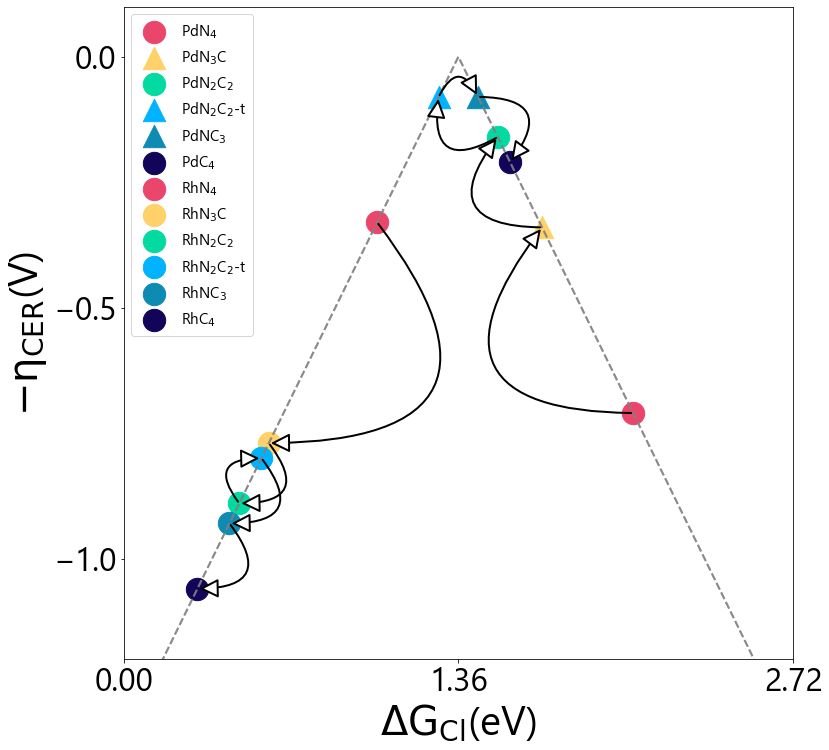

In [21]:
volcano_lwr('Pd','r1','upper right')
volcano_lwr('Rh','r1','upper left')

Text(0.4, 0.04, '$\\mathrm{ΔG_{Cl}}$(eV)')

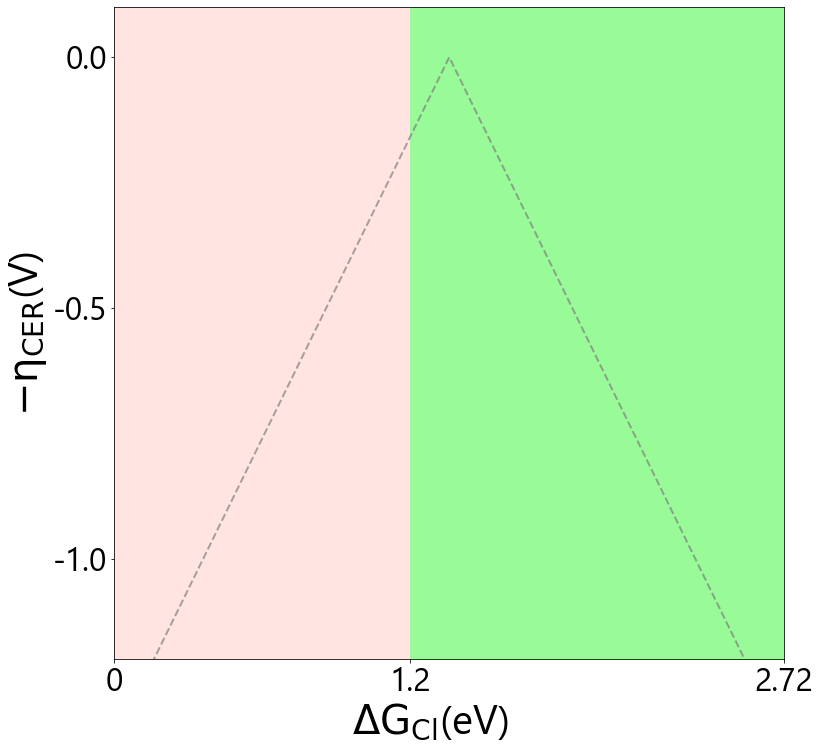

In [22]:
fig = plt.figure(figsize=(12,12))

gs = gridspec.GridSpec(nrows=1, # row 몇 개 
                       ncols=2, # col 몇 개  
                       width_ratios=[1.2, 1.52]
                      )

prop3 = fm.FontProperties(fname=font_loc,size=32)
prop33 = fm.FontProperties(fname=font_loc,size=26)
prop4 = fm.FontProperties(fname=font_loc,size=40)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
fig.subplots_adjust(wspace=0)


ax1.set_facecolor("mistyrose")
ax2.set_facecolor("palegreen")

ax2.set_yticks([])

ax1.set_xlim(0,1.2)
ax2.set_xlim(1.2,2.72)

ax1.set_ylim(-1.2,0.1)
ax2.set_ylim(-1.2,0.1)


ax1.set_xticks([0,1.2])
ax1.set_xticklabels([0,1.2], fontproperties=prop3)
ax2.set_xticks([2.72])
ax2.set_xticklabels([2.72], fontproperties=prop3)

ax1.set_yticks(np.arange(-1,0.1, 0.5))
ax1.set_yticklabels(np.arange(-1,0.1, 0.5), fontproperties=prop3)

ax2.spines['left'].set_visible(False)


x_fit = np.arange(0,1.36*2,0.01)
y_fit1 = x_fit-1.36
y_fit2 = 1.36-x_fit
y_fit = np.maximum(y_fit1,y_fit2)
ax1.plot(x_fit,-y_fit,color='gray', linestyle='--',linewidth=2,alpha=0.7) 
ax2.plot(x_fit,-y_fit,color='gray', linestyle='--',linewidth=2,alpha=0.7) 


          
            




#ax = fig.add_subplot(111, frameon=False)
#ax.set_xlabel('$\mathrm{ΔG_{Cl}}$'+'(eV)', fontproperties=prop4) # Use argument `labelpad` to move label downwards.
#ax.set_ylabel('$\mathrm{-η_{CER}}$'+'(V)', fontproperties=prop4)

#ax1.set_xlabel('$\mathrm{ΔG_{Cl}}$'+'(eV)', fontproperties=prop4)
ax1.set_ylabel('$\mathrm{-η_{CER}}$'+'(V)', fontproperties=prop4)    


fig.text(0.4, 0.04, '$\mathrm{ΔG_{Cl}}$'+'(eV)', fontproperties=prop4)

In [23]:
def volcano(TM,name) :
    

    
    fig = plt.figure(figsize=(12,12))
    #ax = plt.subplot(111, frameon=False)
    #ax.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    #ax.patch.set_visible(False) 
    #ax.set_facecolor('red')
    
    
    gs = gridspec.GridSpec(nrows=1, # row 몇 개 
                           ncols=2, # col 몇 개  
                           width_ratios=[1.2, 1.52]
                          )
    prop3 = fm.FontProperties(fname=font_loc,size=32)
    prop33 = fm.FontProperties(fname=font_loc,size=26)
    prop4 = fm.FontProperties(fname=font_loc,size=40)

    ax1 = fig.add_subplot(gs[0,0])
    ax2 = fig.add_subplot(gs[0,1])
    fig.subplots_adjust(wspace=0)


    ax1.set_facecolor("#F47983")
    ax2.set_facecolor("#44CEF6")
    ax1.patch.set_alpha(0.2)
    ax2.patch.set_alpha(0.2)
    
    ax2.set_yticks([])

    ax1.set_xlim(0,1.2)
    ax2.set_xlim(1.2,2.72)

    ax1.set_ylim(-1.2,0.1)
    ax2.set_ylim(-1.2,0.1)


    ax1.set_xticks([0,1.2])
    ax1.set_xticklabels([0,1.2], fontproperties=prop3)
    ax2.set_xticks([2.72])
    ax2.set_xticklabels([2.72], fontproperties=prop3)

    ax1.set_yticks(np.arange(-1,0.1, 0.5))
    ax1.set_yticklabels(np.arange(-1,0.1, 0.5), fontproperties=prop3)
    ax1.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)


    x_fit = np.arange(0,1.36*2,0.01)
    y_fit1 = x_fit-1.36
    y_fit2 = 1.36-x_fit
    y_fit = np.maximum(y_fit1,y_fit2)
    ax1.plot(x_fit,-y_fit,color='gray', linestyle='--',linewidth=2,alpha=0.7) 
    ax2.plot(x_fit,-y_fit,color='gray', linestyle='--',linewidth=2,alpha=0.7) 




    l = [TM[0]+'N$_4$',TM[0]+'N$_3$C',TM[0]+'N$_2$C$_2$',TM[0]+'N$_2$C$_2$-t',TM[0]+'NC$_3$',TM[0]+'C$_4$']
    j = 0
    

    Gcl = list(df.loc[df['M']== TM[0], 'G_Cl'])
    η_CER = list(df.loc[df['M']== TM[0], 'η_CER'])
    site = list(df.loc[df['M']== TM[0], 'Cl_site'])
    
    j = 0
    

    
    for i in range(len(Gcl)) :
        if site[i] == 't' :
            ax1.scatter(Gcl[i],-η_CER[i], facecolors='none',edgecolors =c[i],s=500,label=l[i],marker='o',linewidth=3)
            
        else :
            ax1.scatter(Gcl[i],-η_CER[i],color=c[i],s=500,label=l[i],marker='^')

        if j < 5 :

            ann = ax1.annotate("",
                              xy=(Gcl[j+1], -η_CER[j+1]), xycoords='data',
                              xytext=(Gcl[j], -η_CER[j]), textcoords='data',
                              size=40, va="center", ha="center",
                              arrowprops=dict(lw=2,arrowstyle="-|>",connectionstyle="arc3,rad=-0.75",fc="w")
                             )
            j = j+1
            
            
    l = [TM[1]+'N$_4$',TM[1]+'N$_3$C',TM[1]+'N$_2$C$_2$',TM[1]+'N$_2$C$_2$-t',TM[1]+'NC$_3$',TM[1]+'C$_4$']
    j = 0
    

    Gcl = list(df.loc[df['M']== TM[1], 'G_Cl'])
    η_CER = list(df.loc[df['M']== TM[1], 'η_CER'])
    site = list(df.loc[df['M']== TM[1], 'Cl_site'])
    
    j = 0
    for i in range(len(Gcl)) :
        if site[i] == 't' :
            ax2.scatter(Gcl[i],-η_CER[i],color=c[i],s=500,label=l[i],marker='o')
            
        else :
            ax2.scatter(Gcl[i],-η_CER[i],color=c[i],s=500,label=l[i],marker='^')

        if j < 5 :

            ann = ax2.annotate("",
                              xy=(Gcl[j+1], -η_CER[j+1]), xycoords='data',
                              xytext=(Gcl[j], -η_CER[j]), textcoords='data',
                              size=40, va="center", ha="center",
                              arrowprops=dict(lw=2,arrowstyle="-|>",connectionstyle="arc3,rad=-1",fc="w")
                             )
            j = j+1
            
            
    ax1.set_ylabel('$\mathrm{-η_{CER}}$'+'(V)', fontproperties=prop4)    


    fig.text(0.4, 0.04, '$\mathrm{ΔG_{Cl}}$'+'(eV)', fontproperties=prop4)            
    
    
    ax1.legend(loc = 'upper left', borderpad=0.5,labelspacing=0.5,prop={'family': font_name,'size':fss})
    ax2.legend(loc = 'upper right', borderpad=0.5,labelspacing=0.5,prop={'family': font_name,'size':fss})



#ax = fig.add_subplot(111, frameon=False)
#ax.set_xlabel('$\mathrm{ΔG_{Cl}}$'+'(eV)', fontproperties=prop4) # Use argument `labelpad` to move label downwards.
#ax.set_ylabel('$\mathrm{-η_{CER}}$'+'(V)', fontproperties=prop4)

#ax1.set_xlabel('$\mathrm{ΔG_{Cl}}$'+'(eV)', fontproperties=prop4)


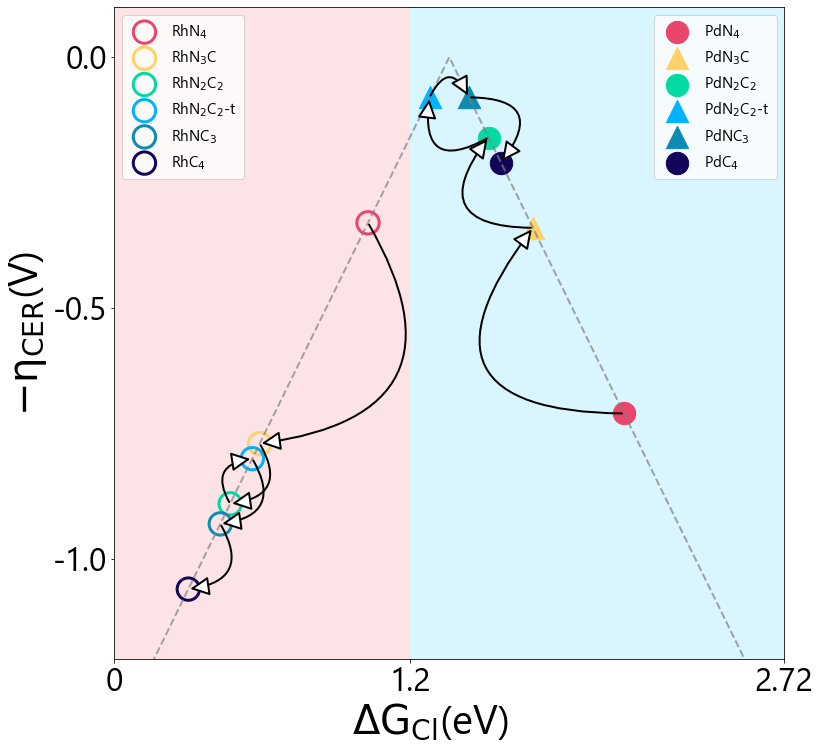

In [24]:
volcano(['Rh','Pd'],'name')